[]

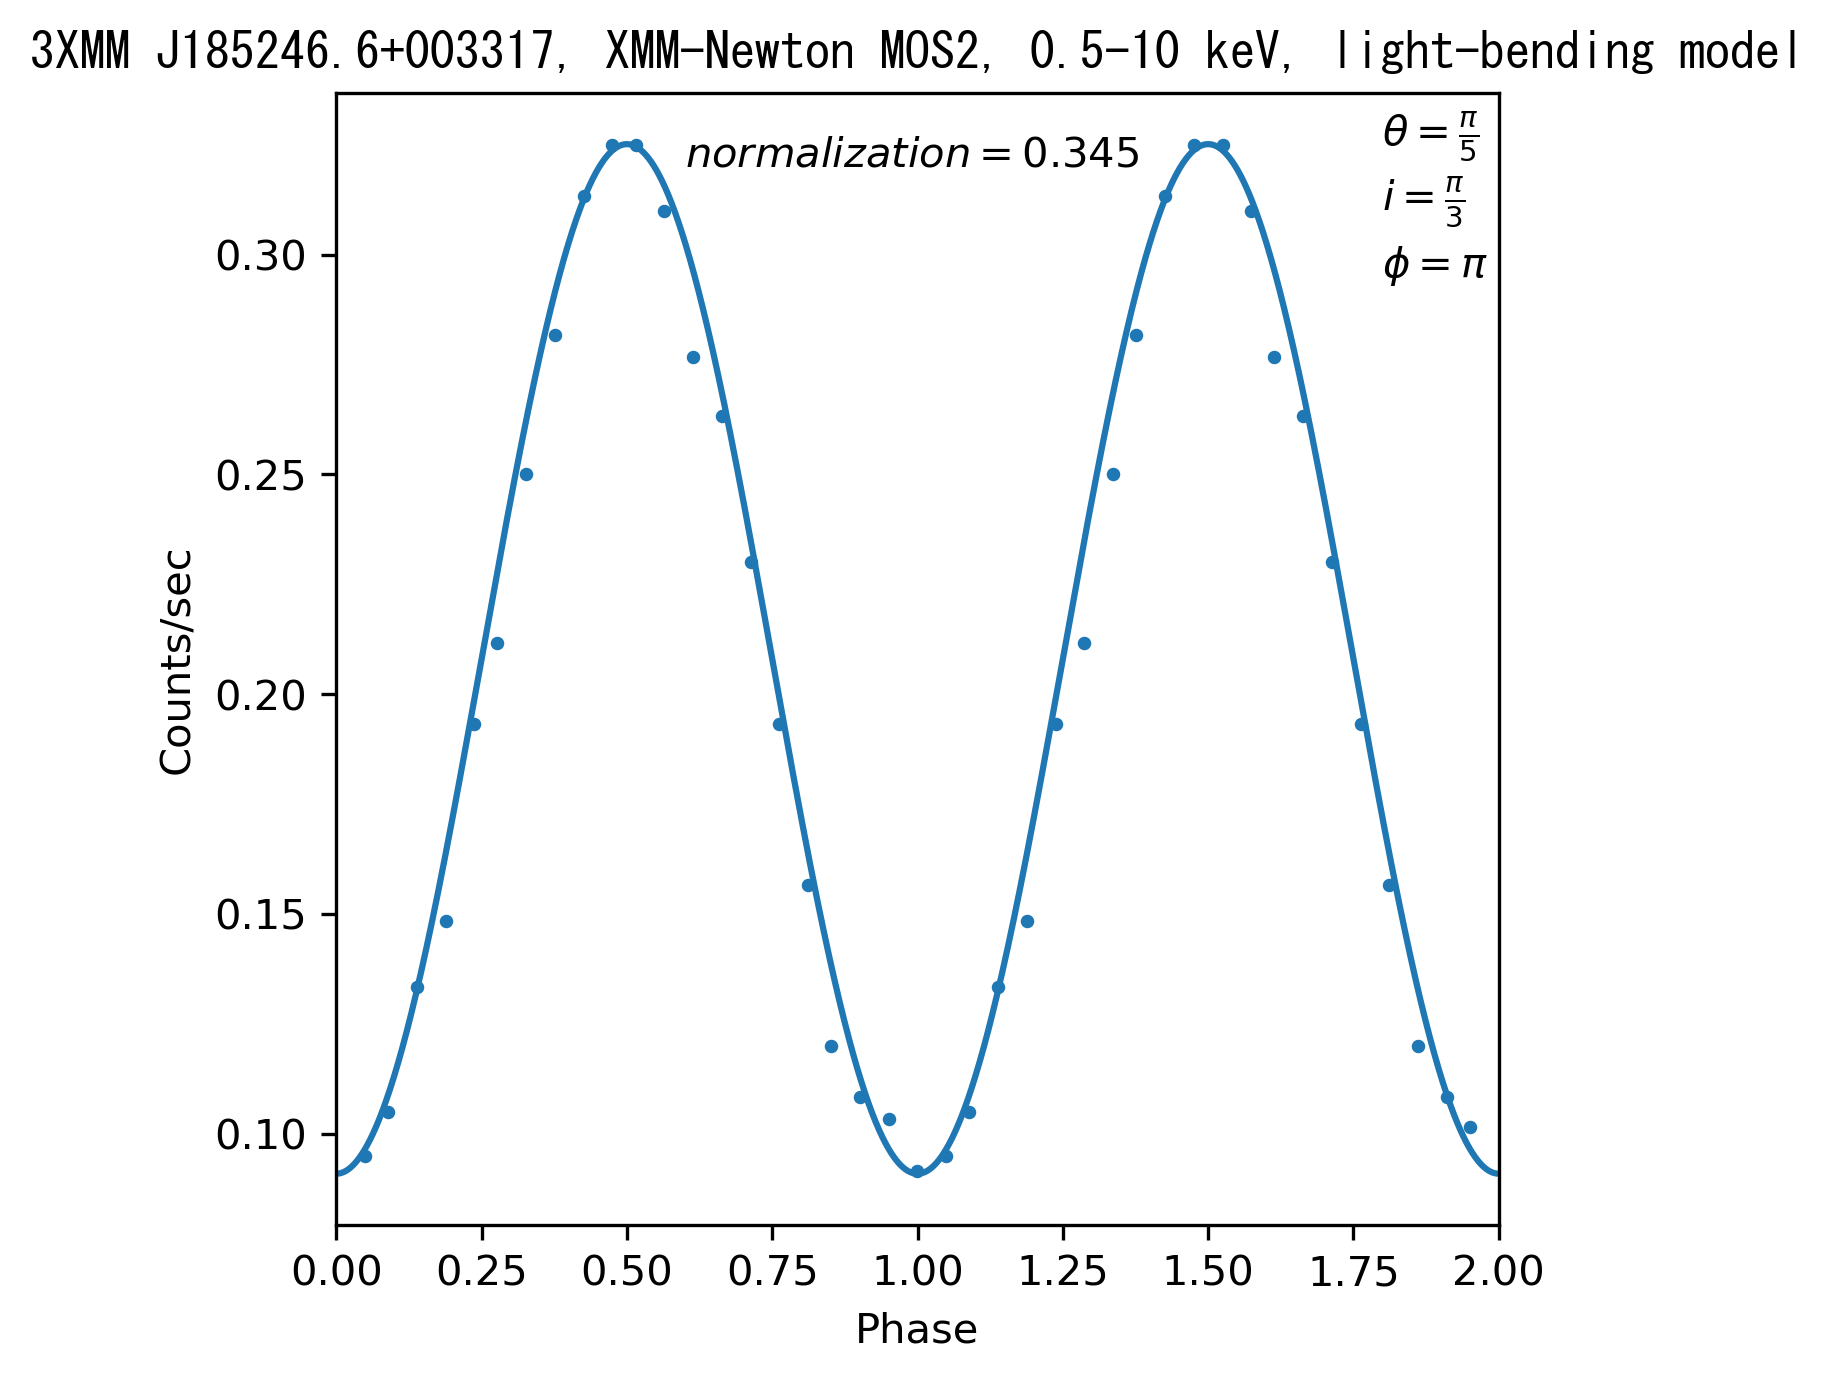

In [14]:
# only magnetar

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# pulse profile
# theta = pi / 5
# i = pi / 3
a_p = math.pi / 5
b_p = math.pi / 3
c_p = math.pi
d_p = 0.345
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

#3XMM J185246.6+003317 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 3XMM J185246.6+003317
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

fig = plt.figure(figsize=(5, 5), dpi = 300)
ax = plt.axes()
# data
ax.scatter(x_data, y_data, s = 5)
# pulse profile
ax.set_xlim(0, 2)
ax.plot(x, func(x, a_p, b_p, c_p, d_p))
ax.set_xlabel('Phase')
ax.set_ylabel('Counts/sec')
# info
ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
ax.text(1.8, 0.295, r"$\phi = \pi$")
ax.text(0.6, 0.32, r"$normalization = 0.345$")
plt.title("3XMM J185246.6+003317, XMM-Newton MOS2, 0.5-10 keV, light-bending model", fontname = "MS Gothic")
ax.plot()

<IPython.core.display.Javascript object>


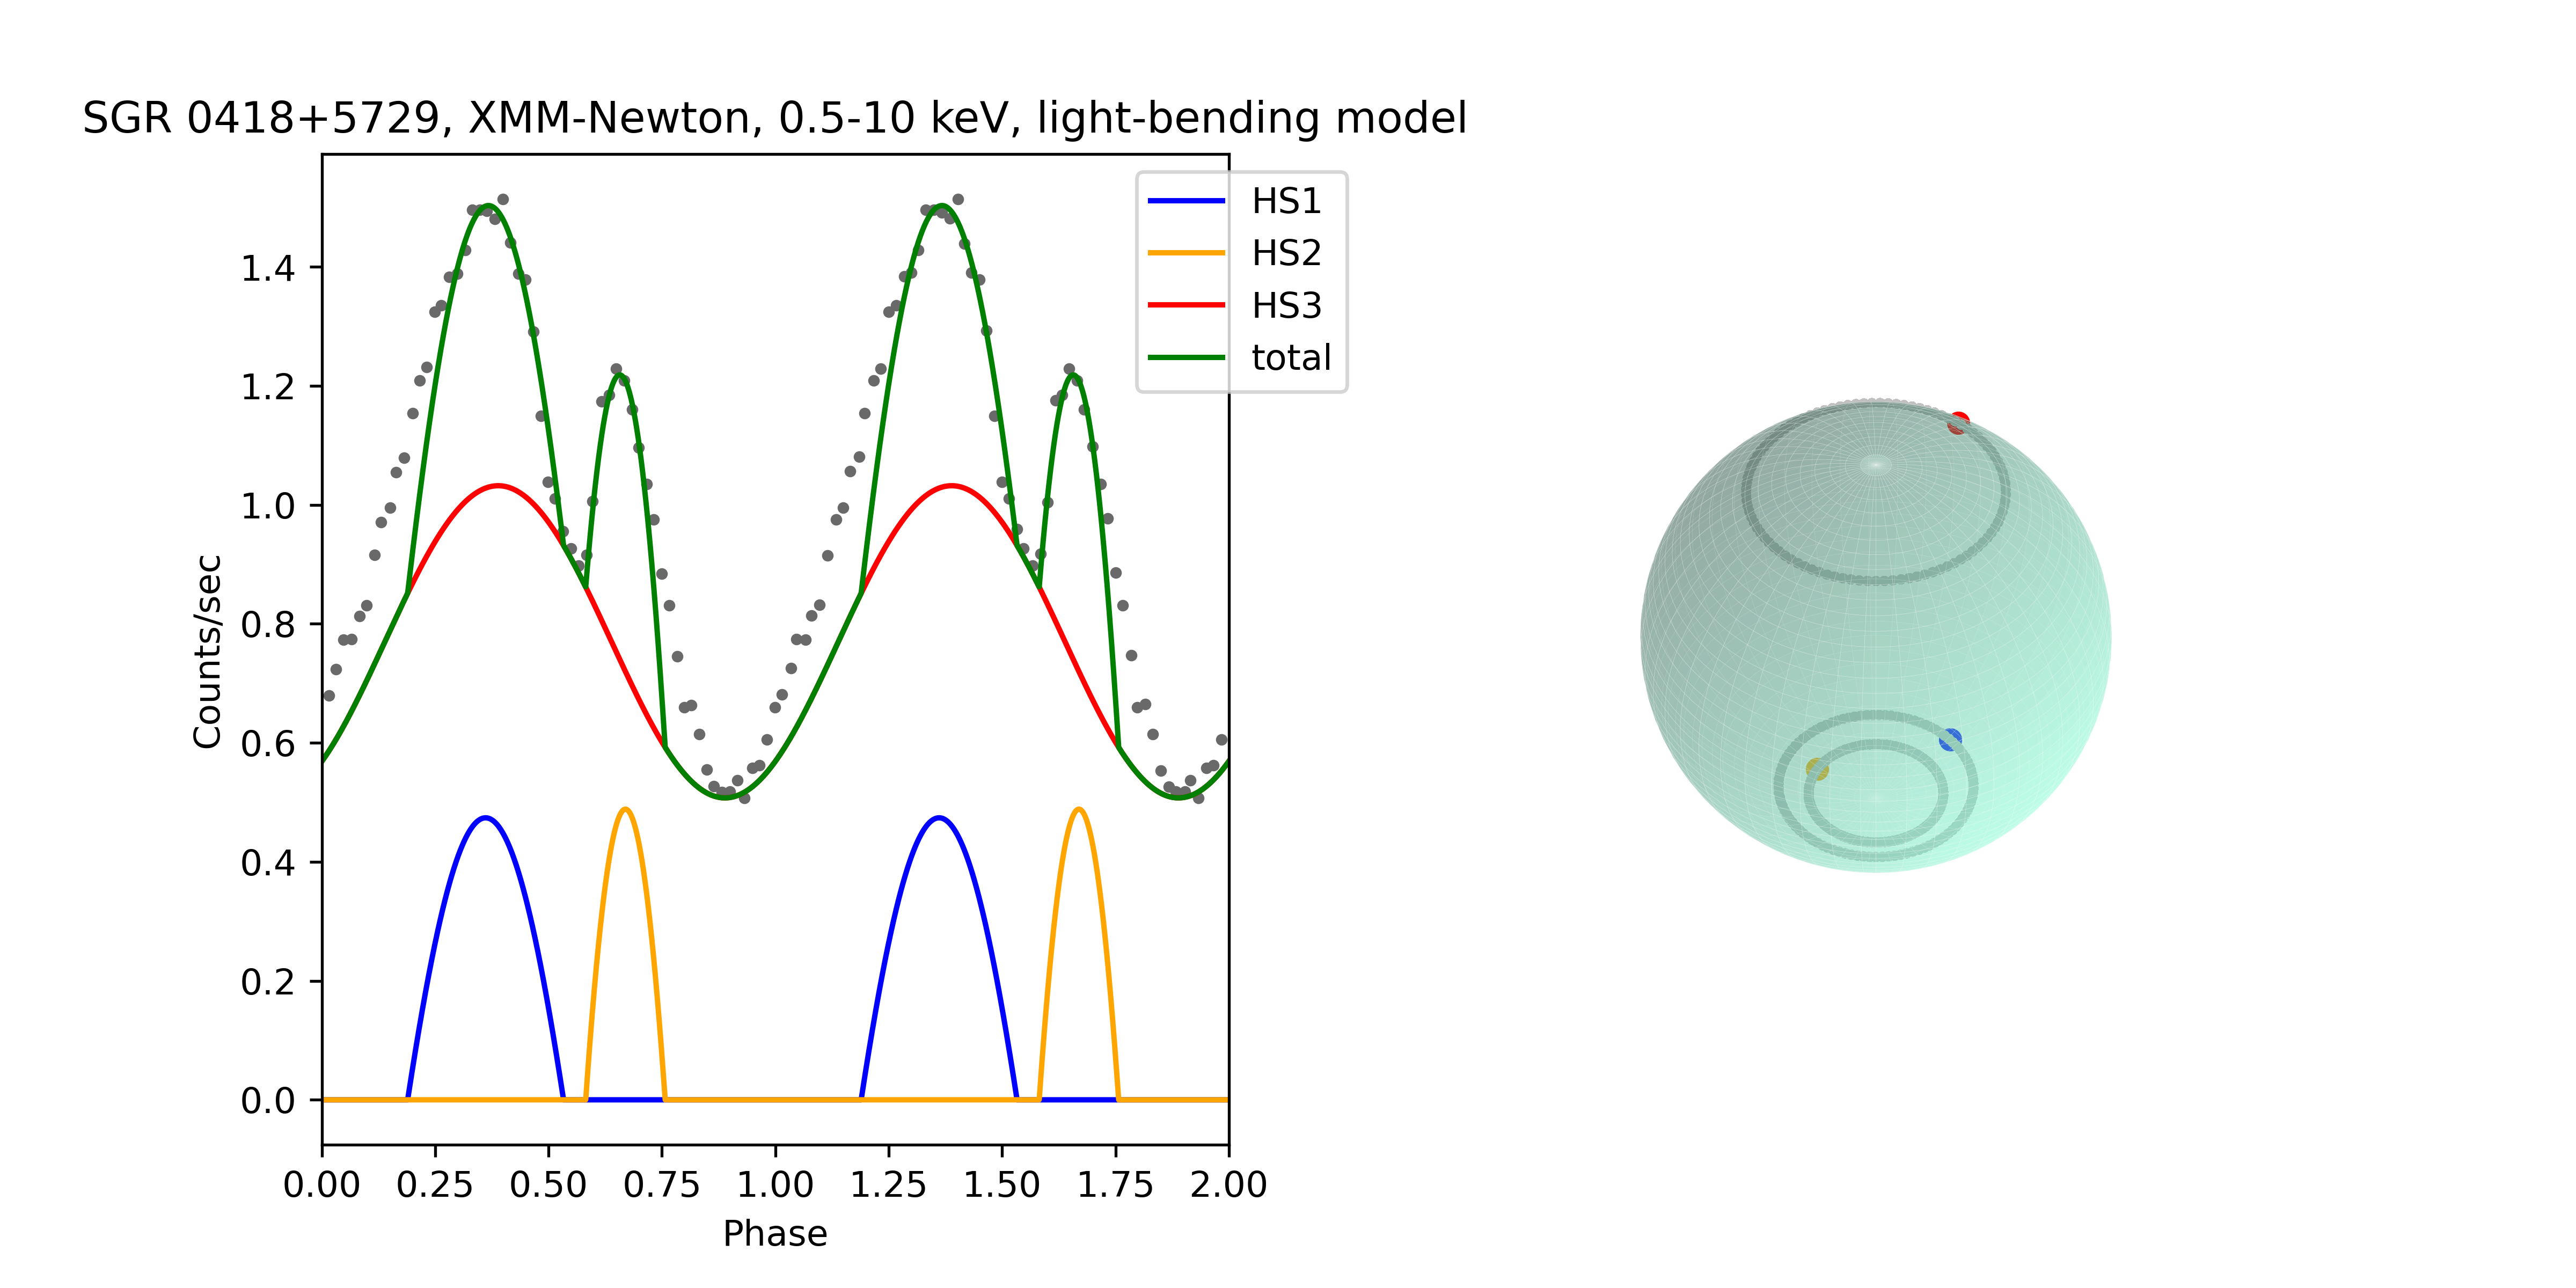

Normalization factor of HS1 is 4.5
Normalization factor of HS2 is 24
Normalization factor of HS3 is 1.05


In [80]:
#%matplotlib notebook
%matplotlib qt

# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# geometric figure
# Create a new figure
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = "3d")
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
# HS1
a_p_1 = np.radians(155)
b_p_1 = math.pi / 4
c_p_1 = np.radians(130)
d_p_1 = 4.5
# HS2
a_p_2 = np.radians(163)
b_p_2 = math.pi / 4
c_p_2 = np.radians(241)
d_p_2 = 24
# HS3
a_p_3 = np.radians(32)
b_p_3 = math.pi / 4
c_p_3 = np.radians(140)
d_p_3 = 1.05

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b_p_1, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b_p_2, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b_p_3, c_p_3, d_p_3)

# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)

x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue", zorder =1000000)
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS1 + HS2 + HS3, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0418+5729, XMM-Newton, 0.5-10 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

ax2.set_box_aspect((1,1,1))
ax2.view_init(elev = 45, azim = 0)
ax2.axis("off")

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)

plt.savefig("SGR_0418+5729_3_hot_spot.jpg", dpi = 400)

<IPython.core.display.Javascript object>


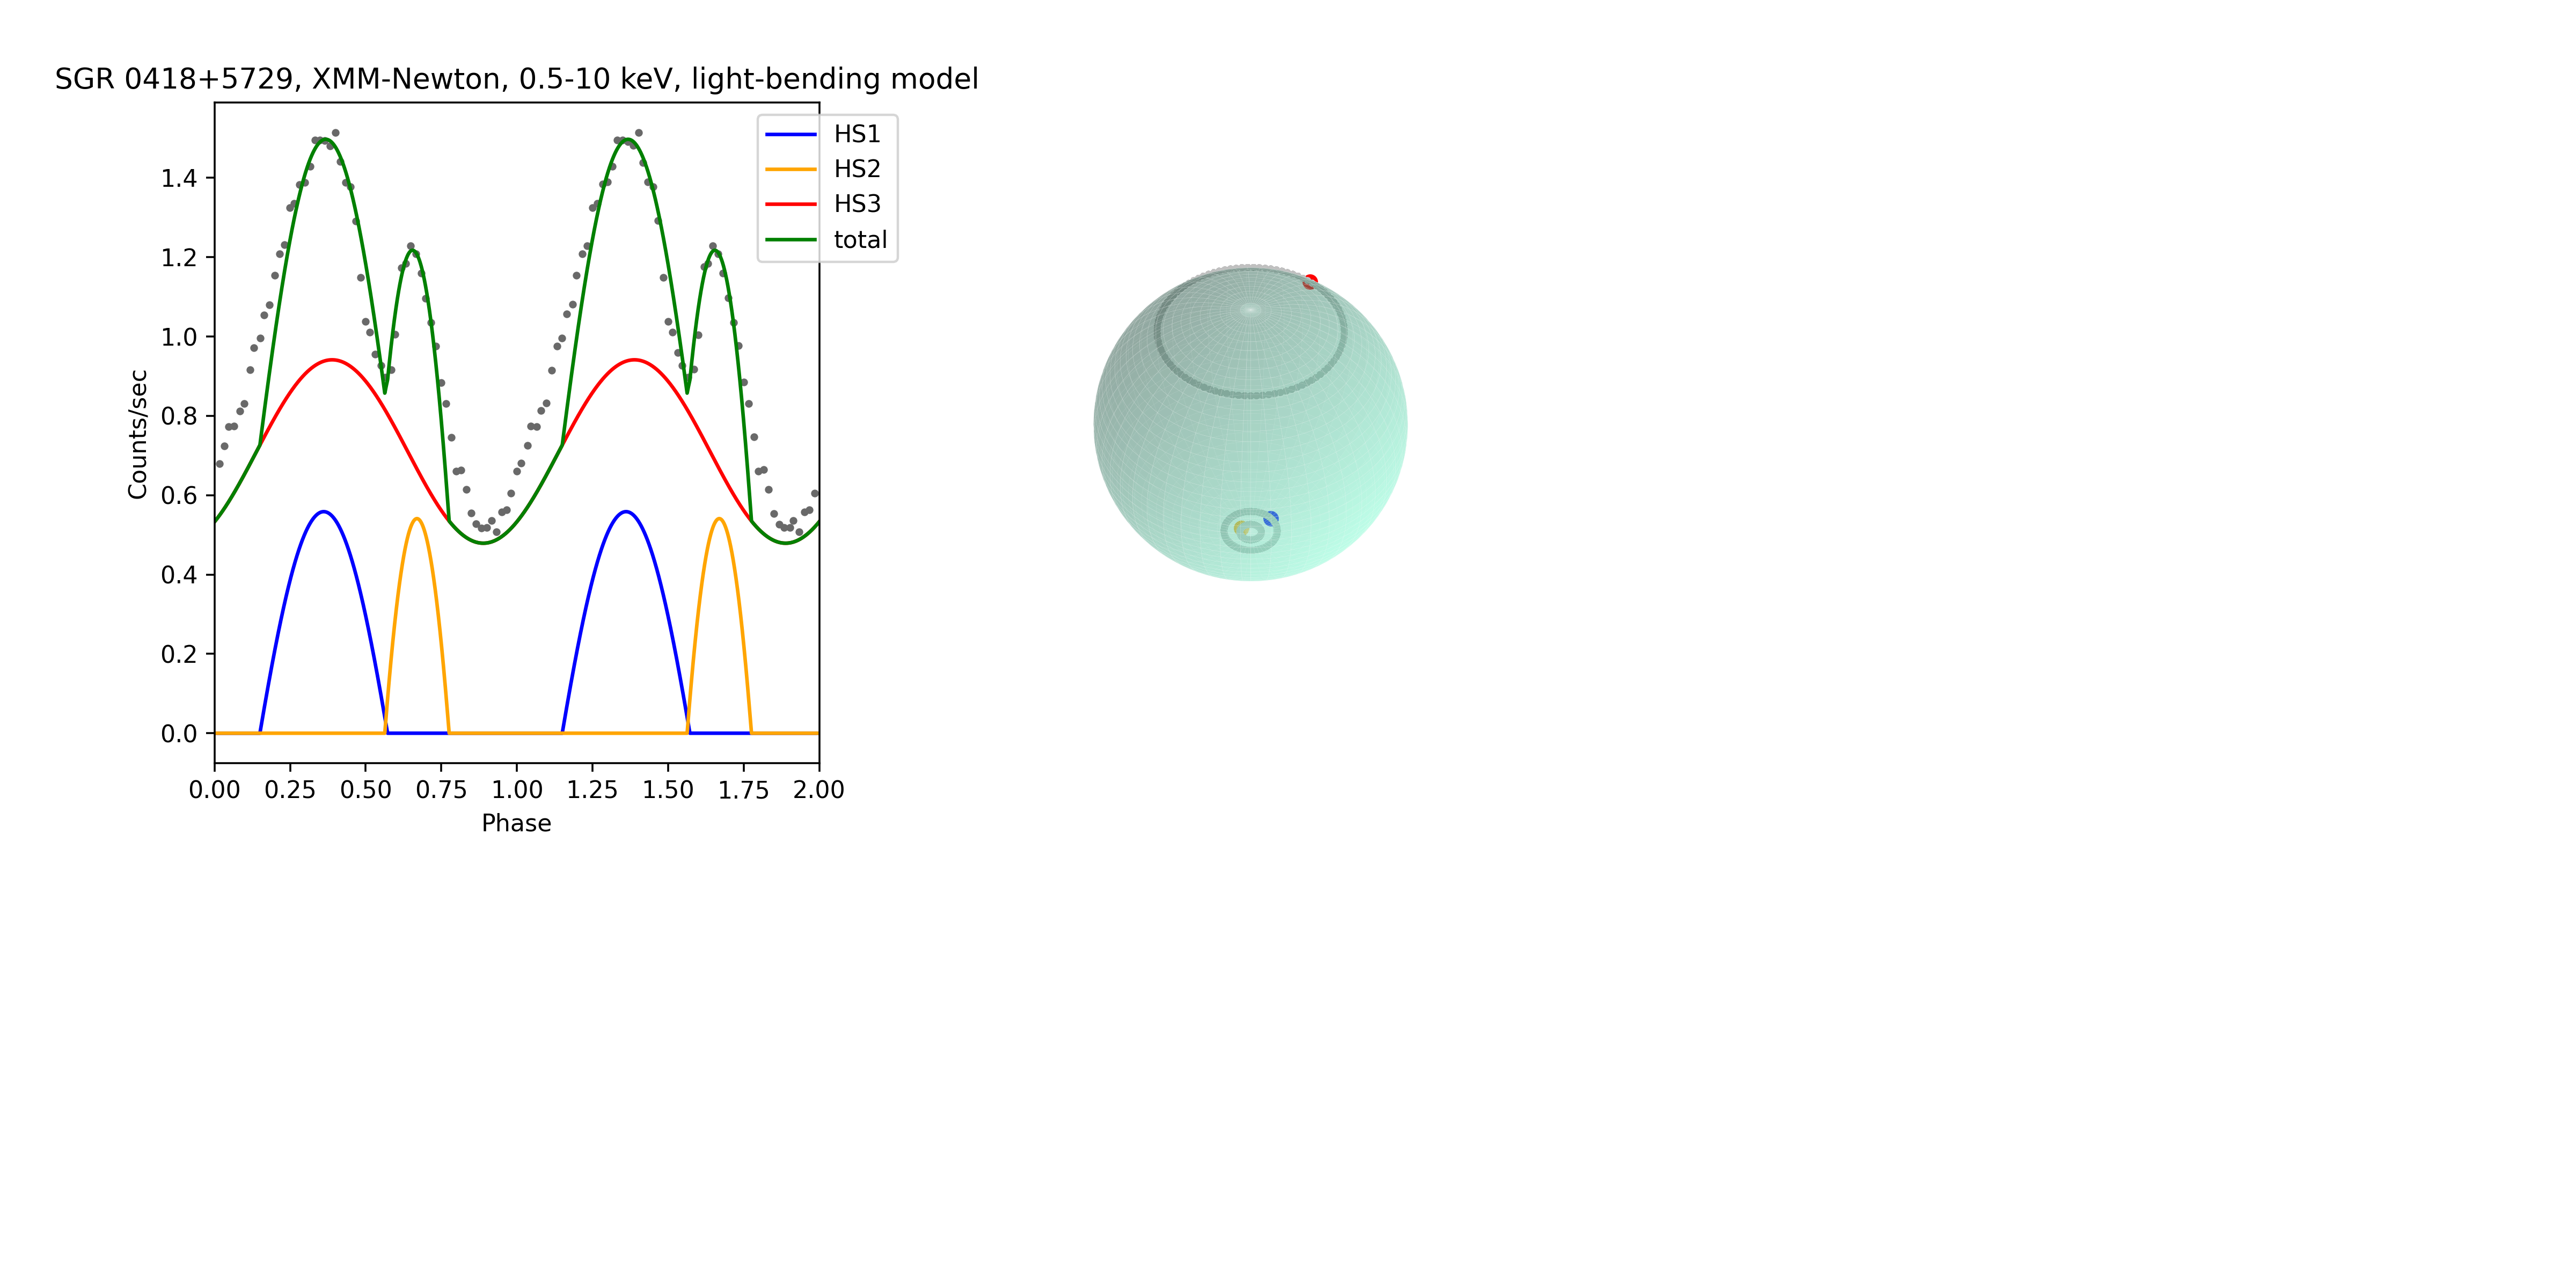

Normalization factor of HS1 is 10
Normalization factor of HS2 is 85
Normalization factor of HS3 is 0.95


In [78]:
%matplotlib qt

# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# geometric figure
# Create a new figure
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = "3d")
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
# HS1
a_p_1 = np.radians(170)
b_p_1 = math.pi / 4
c_p_1 = np.radians(130)
d_p_1 = 10
# HS2
a_p_2 = np.radians(176)
b_p_2 = math.pi / 4
c_p_2 = np.radians(241)
d_p_2 = 85
# HS3
a_p_3 = np.radians(35)
b_p_3 = math.pi / 4
c_p_3 = np.radians(140)
d_p_3 = 0.95

# light-bending factor
f_lb = 1. / 2.5

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b_p_1, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b_p_2, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b_p_3, c_p_3, d_p_3)

# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)

x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS1 + HS2 + HS3, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0418+5729, XMM-Newton, 0.5-10 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

ax2.set_box_aspect((1,1,1))
ax2.view_init(elev = 45, azim = 0)
ax2.axis("off")

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)

plt.savefig("SGR_0418+5729_3_hot_spot.jpg", dpi = 400)

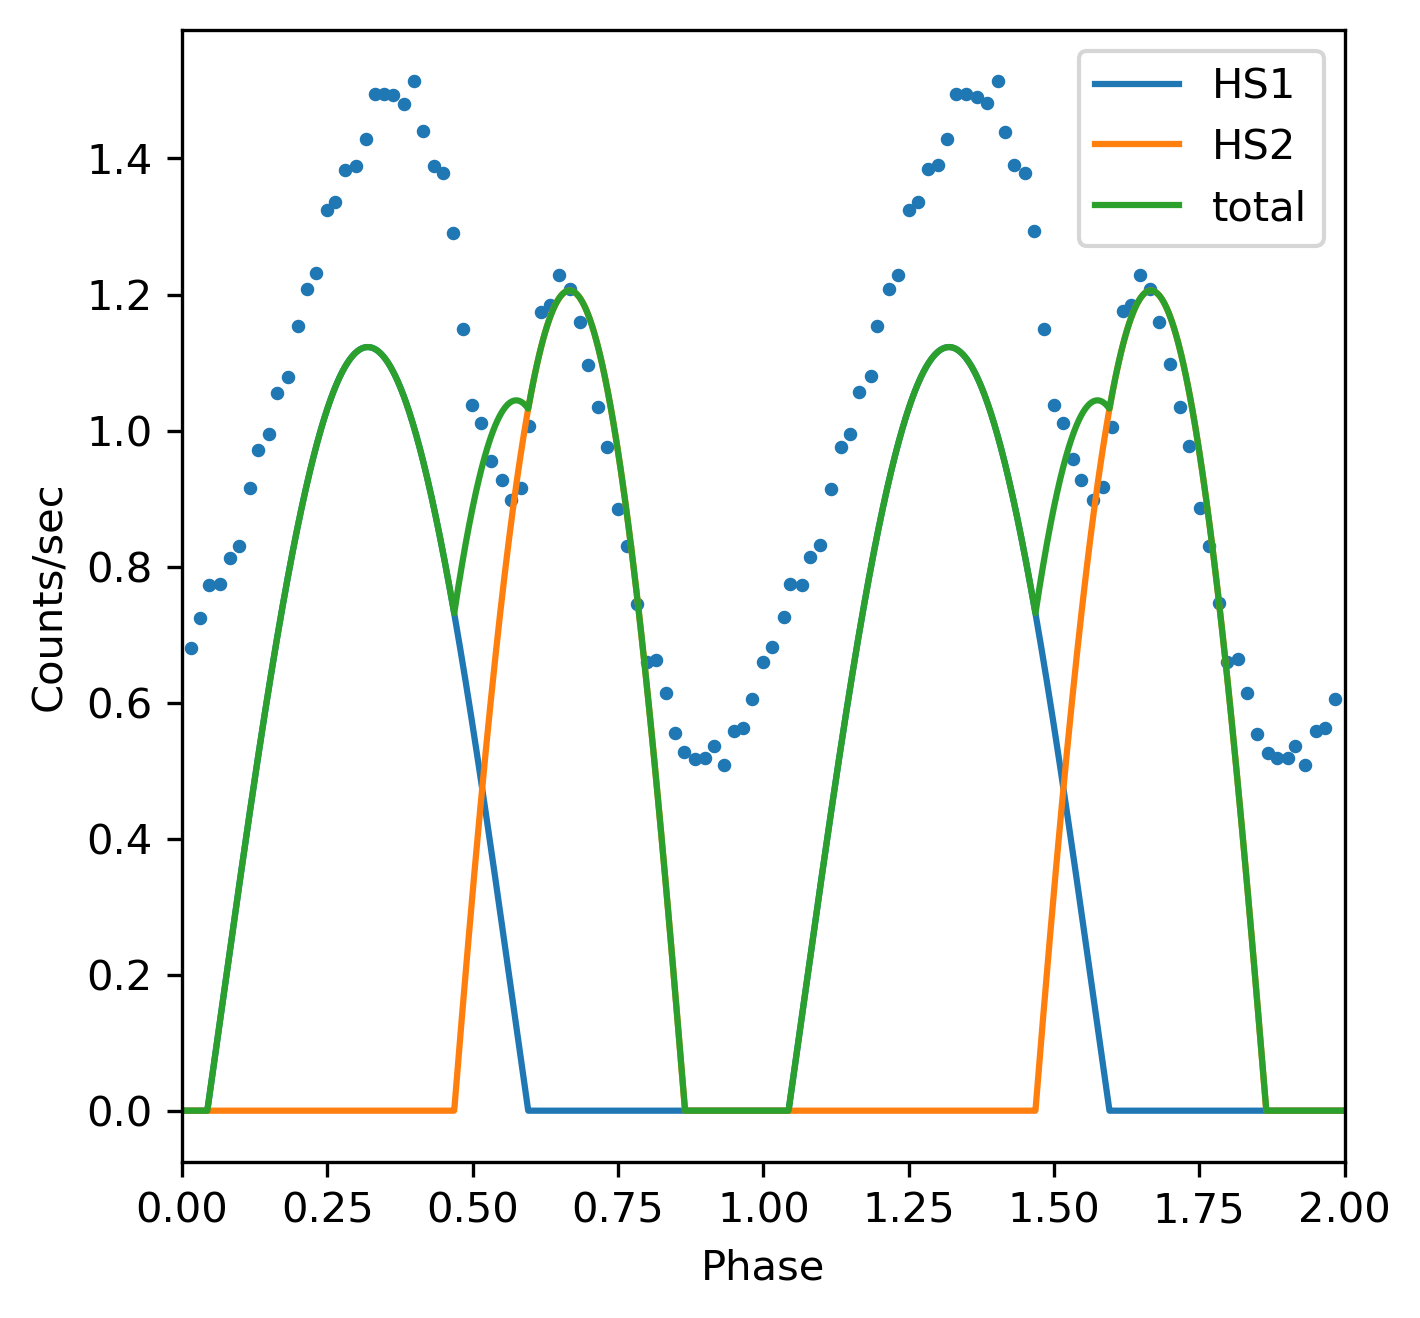

In [9]:
# SGR 0418+5729 with 2 HS

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# pulse profile
# theta = pi / 5
# i = pi / 3
a_p_1 = np.radians(125)
b_p_1 = math.pi / 4
c_p_1 = np.radians(115)
d_p_1 = 2.5

a_p_2 = np.radians(150)
b_p_2 = math.pi / 4
c_p_2 = np.radians(240)
d_p_2 = 7.5

# a_p_3 = np.radians(10)
# b_p_3 = math.pi / 4
# c_p_3 = 13 * math.pi / 16
# d_p_3 = 0.7

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b_p_1, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b_p_2, c_p_2, d_p_2)
# HS3 = func(x, a_p_3, b_p_3, c_p_3, d_p_3)

#SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

fig = plt.figure(figsize=(5, 5), dpi = 300)
ax = plt.axes()
# data
ax.scatter(x_data, y_data, s = 5)
# pulse profile
ax.set_xlim(0, 2)
ax.plot(x, HS1, label = "HS1")
ax.plot(x, HS2, label = "HS2")
# ax.plot(x, HS3, label = "HS3")
ax.plot(x, HS1 + HS2, label = "total")
ax.set_xlabel('Phase')
ax.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax.plot()
ax.legend()

ValueError: x and y must have same first dimension, but have shapes (10000,) and (20000,)

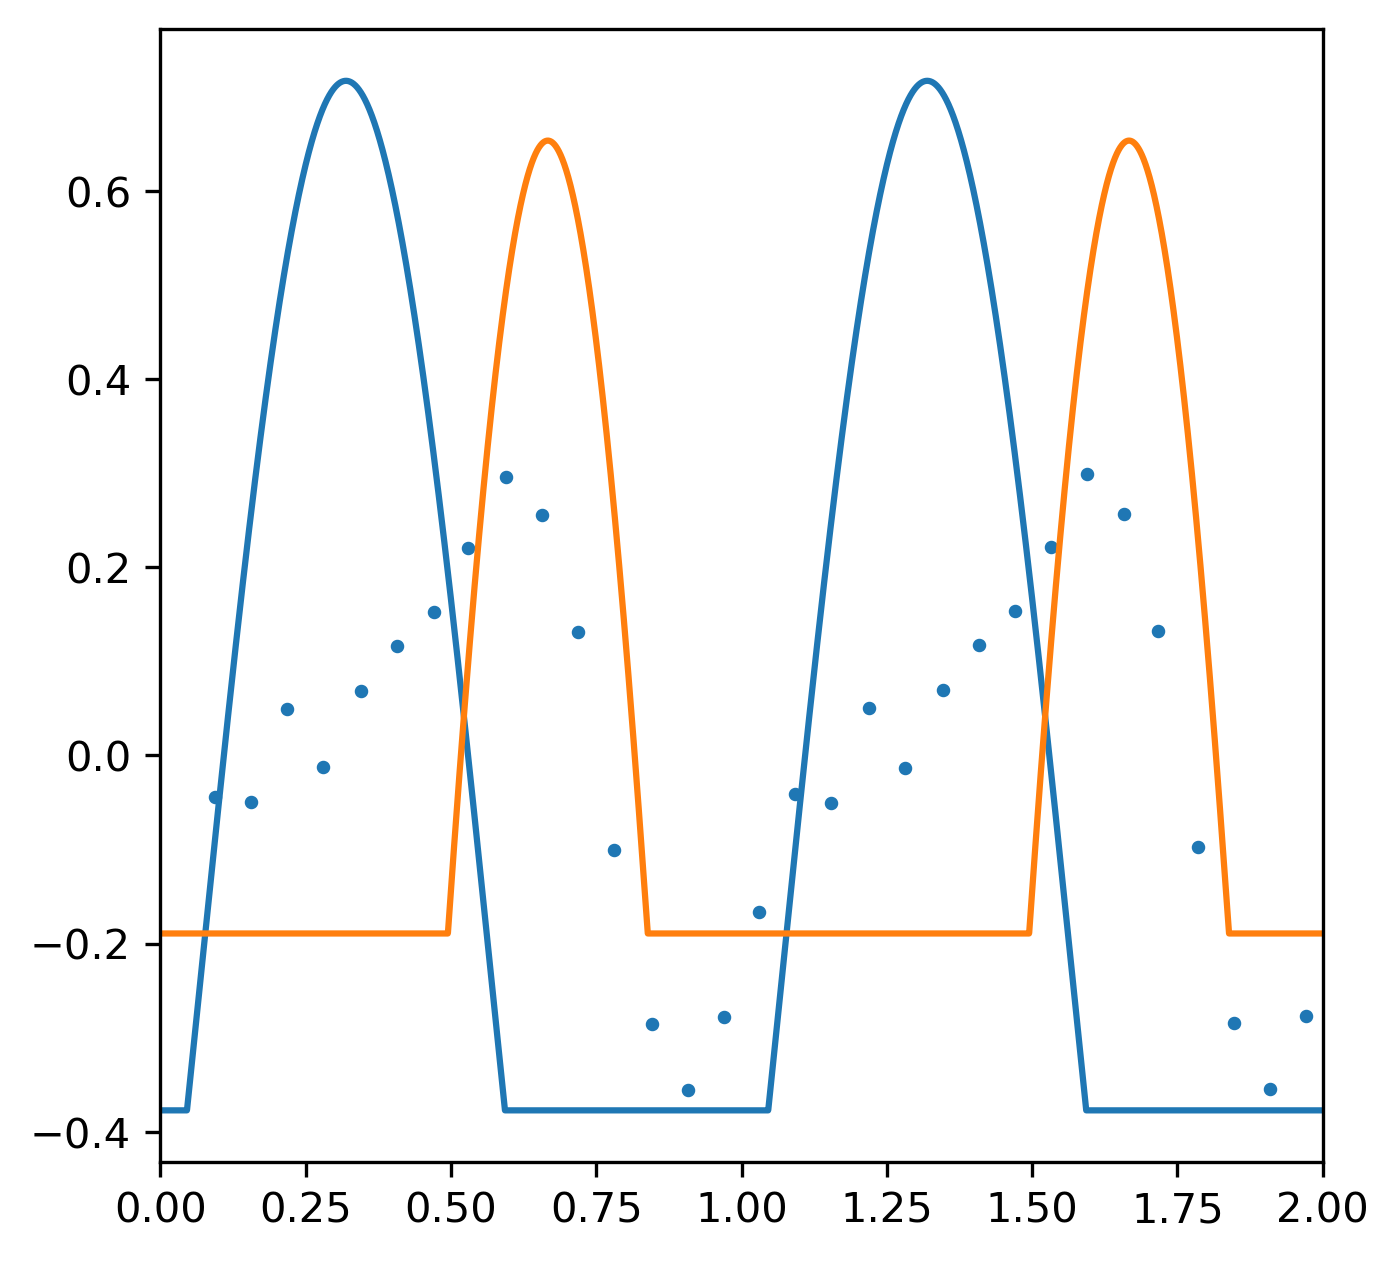

In [40]:
# 4U 0142+61 with 2 HS
# data of this one get mean substracted, failed to fit

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# pulse profile
# theta = pi / 5
# i = pi / 3
a_p_1 = 14 * math.pi / 20
b_p_1 = math.pi / 4
c_p_1 = np.radians(115)
d_p_1 = 2.5

a_p_2 = np.radians(155)
b_p_2 = math.pi / 4
c_p_2 = 4 * math.pi / 3
d_p_2 = 8

# a_p_3 = np.radians(10)
# b_p_3 = math.pi / 4
# c_p_3 = 13 * math.pi / 16
# d_p_3 = 0.7

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# mean substracted
HS1 = func(x, a_p_1, b_p_1, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b_p_2, c_p_2, d_p_2)
# HS3 = func(x, a_p_3, b_p_3, c_p_3, d_p_3)
HS1 = [x - np.average(HS1) for x in HS1]
HS2 = [x - np.average(HS2) for x in HS2]
# HS3 = [x - np.average(HS3) for x in HS3]

x_p = np.linspace(-0.5, 2.5, 10000)

#SGR 0418+5729 from paper:
df = pd.read_csv('4U 0142+61_3.7-9.2keV_mean_subtracted.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

fig = plt.figure(figsize=(5, 5), dpi = 300)
ax = plt.axes()
# data
ax.scatter(x_data, y_data, s = 5)
# pulse profile
ax.set_xlim(0, 2)
ax.plot(x_p, HS1, label = "HS1")
ax.plot(x_p, HS2, label = "HS2")
# ax.plot(x, HS3, label = "HS3")
ax.plot(x_p, HS1 + HS2, label = "total")
ax.set_xlabel('Phase')
ax.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax.plot()
ax.legend()

In [ ]:
# SGR 0418+5729 with 2 HS

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# pulse profile
# theta = pi / 5
# i = pi / 3
a_p_1 = np.radians(125)
b_p_1 = math.pi / 4
c_p_1 = np.radians(115)
d_p_1 = 2.5

a_p_2 = np.radians(150)
b_p_2 = math.pi / 4
c_p_2 = np.radians(240)
d_p_2 = 7.5

# a_p_3 = np.radians(10)
# b_p_3 = math.pi / 4
# c_p_3 = 13 * math.pi / 16
# d_p_3 = 0.7

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b_p_1, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b_p_2, c_p_2, d_p_2)
# HS3 = func(x, a_p_3, b_p_3, c_p_3, d_p_3)

#SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

fig = plt.figure(figsize=(5, 5), dpi = 300)
ax = plt.axes()
# data
ax.scatter(x_data, y_data, s = 5)
# pulse profile
ax.set_xlim(0, 2)
ax.plot(x, HS1, label = "HS1")
ax.plot(x, HS2, label = "HS2")
# ax.plot(x, HS3, label = "HS3")
ax.plot(x, HS1 + HS2, label = "total")
ax.set_xlabel('Phase')
ax.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax.plot()
ax.legend()

<IPython.core.display.Javascript object>


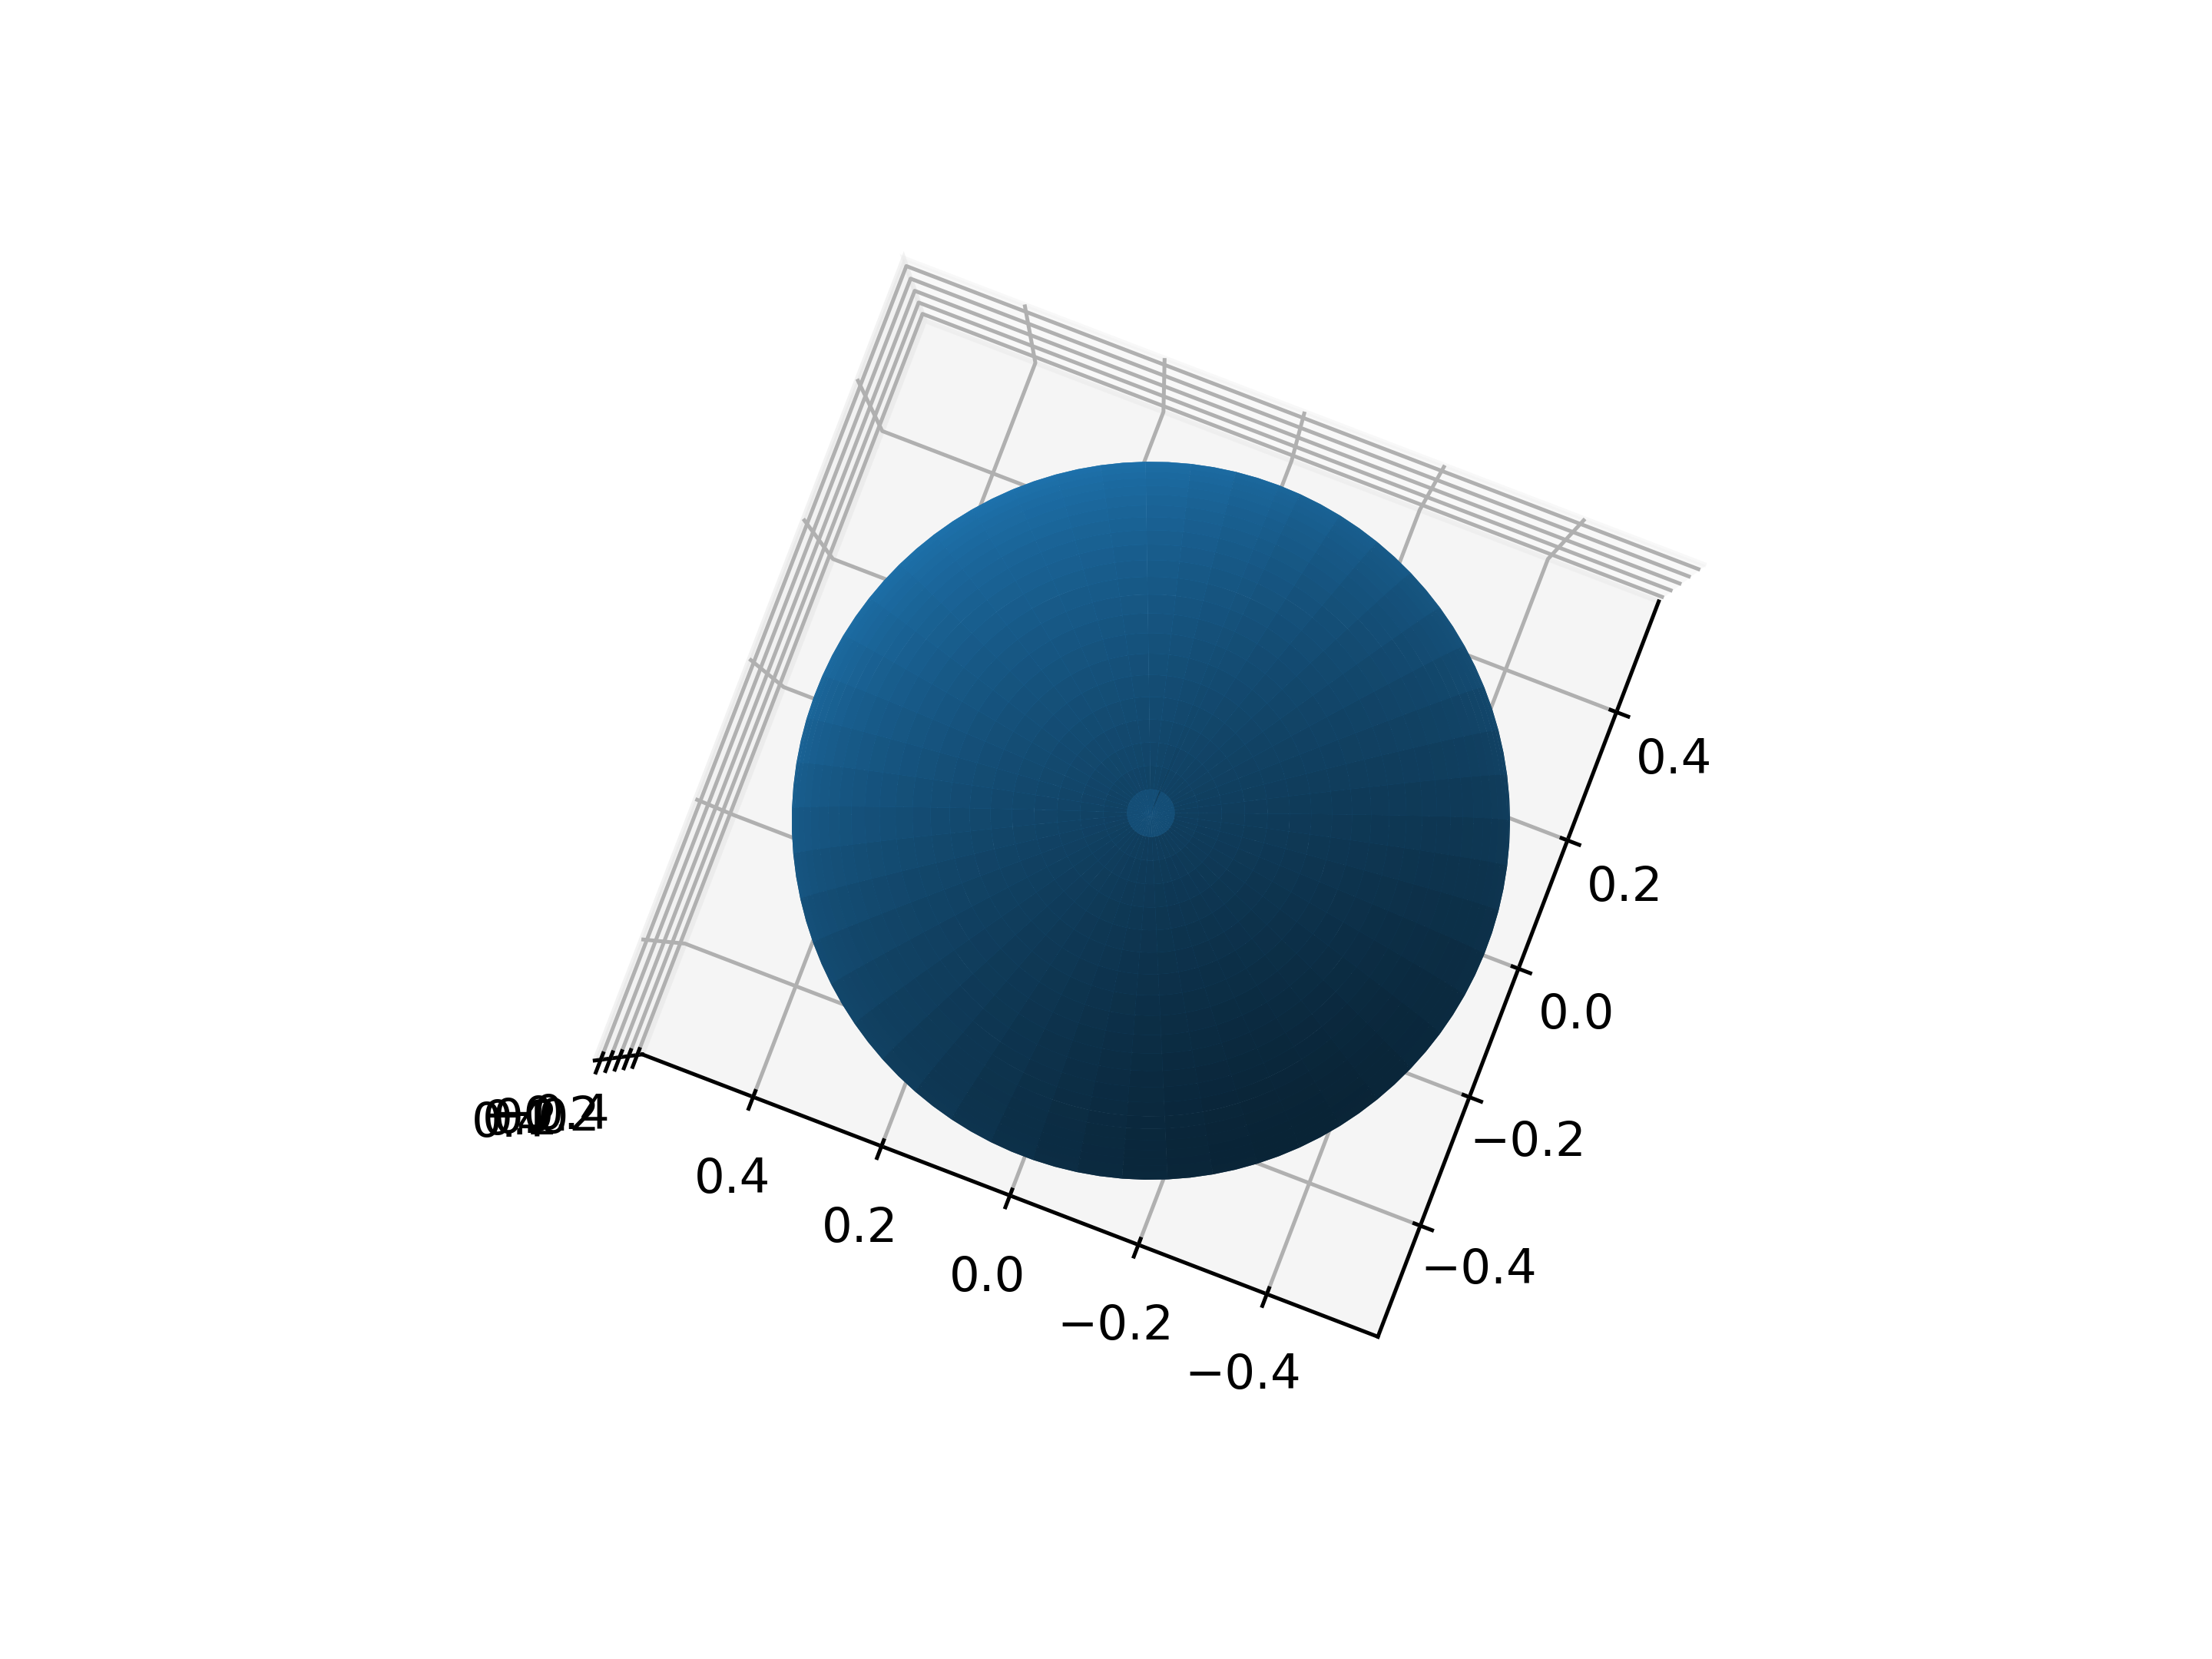

In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure
fig = plt.figure(dpi = 300)
# Get the current axes, and tell Matplotlib to use the 3D projection
ax = fig.add_subplot(111, projection='3d')

# Set the scaling factor for the sphere
scale = 0.5

# Create a sphere
r = 1 # radius
phi, theta = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]
x = scale*r*np.sin(phi)*np.cos(theta)
y = scale*r*np.sin(phi)*np.sin(theta)
z = scale*r*np.cos(phi)

# Plot the sphere
ax.plot_surface(x, y, z)

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


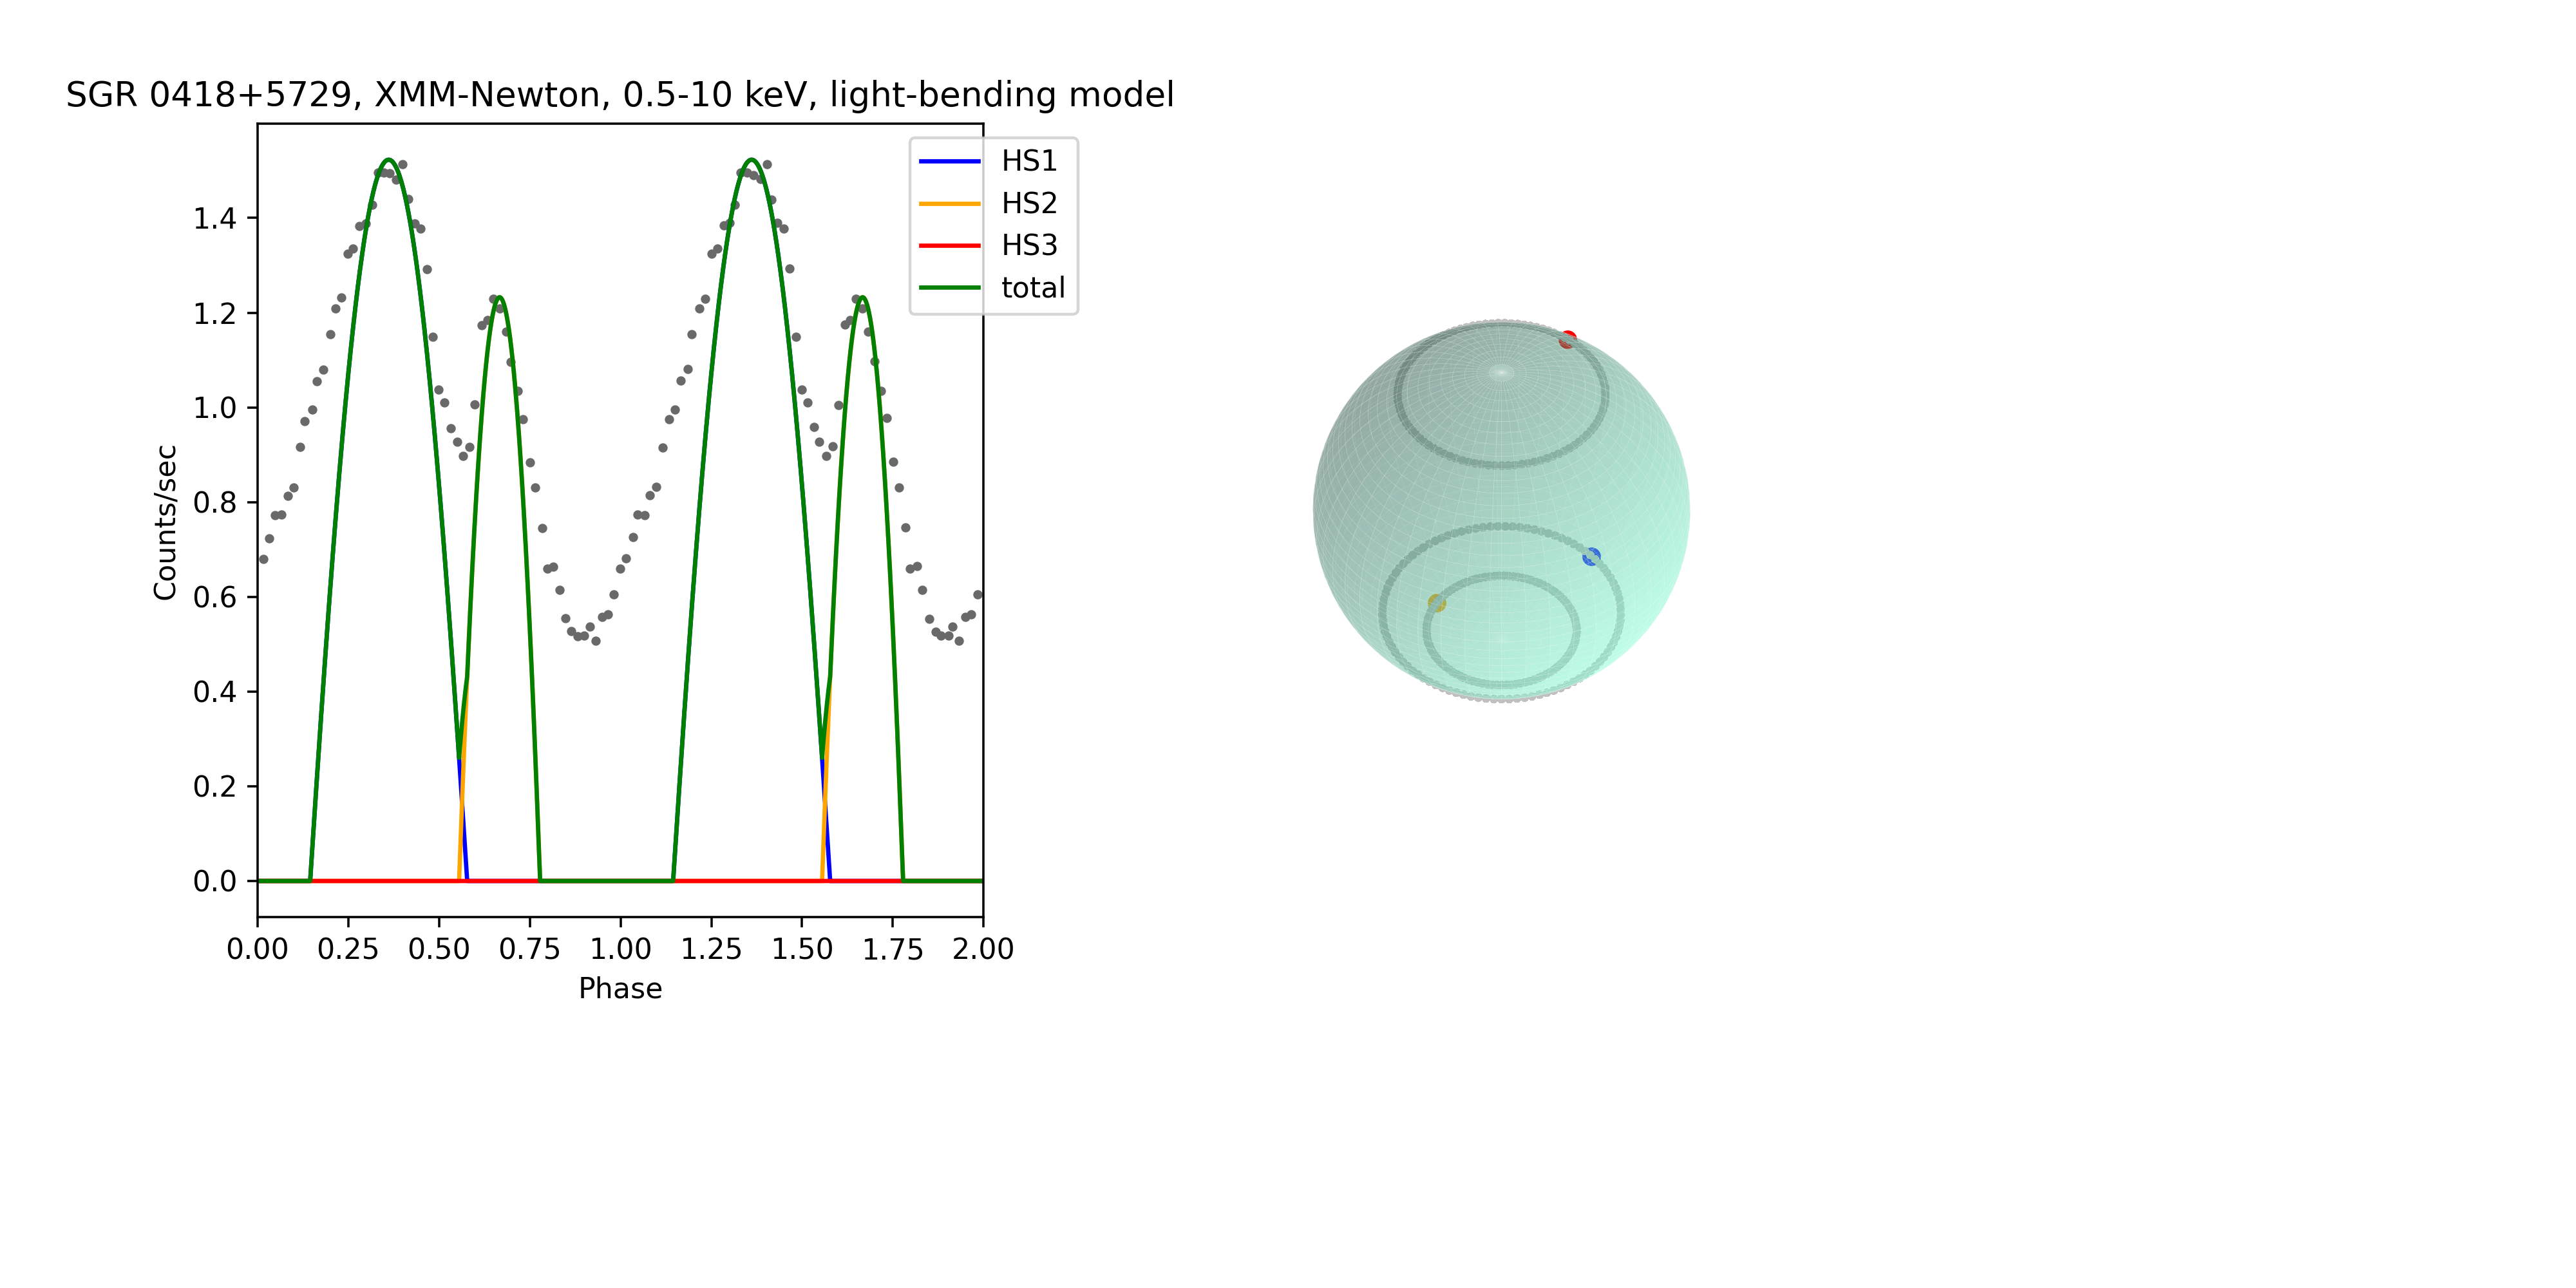

Normalization factor of HS1 is 7
Normalization factor of HS2 is 30
Normalization factor of HS3 is 0


In [97]:
#%matplotlib notebook
%matplotlib qt

# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# geometric figure
# Create a new figure
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = "3d")
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
b = np.radians(40)
# HS1
a_p_1 = np.radians(140)
c_p_1 = np.radians(130)
d_p_1 = 7
# HS2
a_p_2 = np.radians(156)
c_p_2 = np.radians(240)
d_p_2 = 30
# HS3
a_p_3 = np.radians(32)
c_p_3 = np.radians(140)
d_p_3 = 0 #0.95

# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b, c_p_3, d_p_3)

# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)

x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS1 + HS2 + HS3, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0418+5729, XMM-Newton, 0.5-10 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

ax2.set_box_aspect((1,1,1))
ax2.view_init(elev = 45, azim = 0)
ax2.axis("off")

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)

plt.savefig("SGR_0418+5729_3_hot_spot.jpg", dpi = 400)

<IPython.core.display.Javascript object>


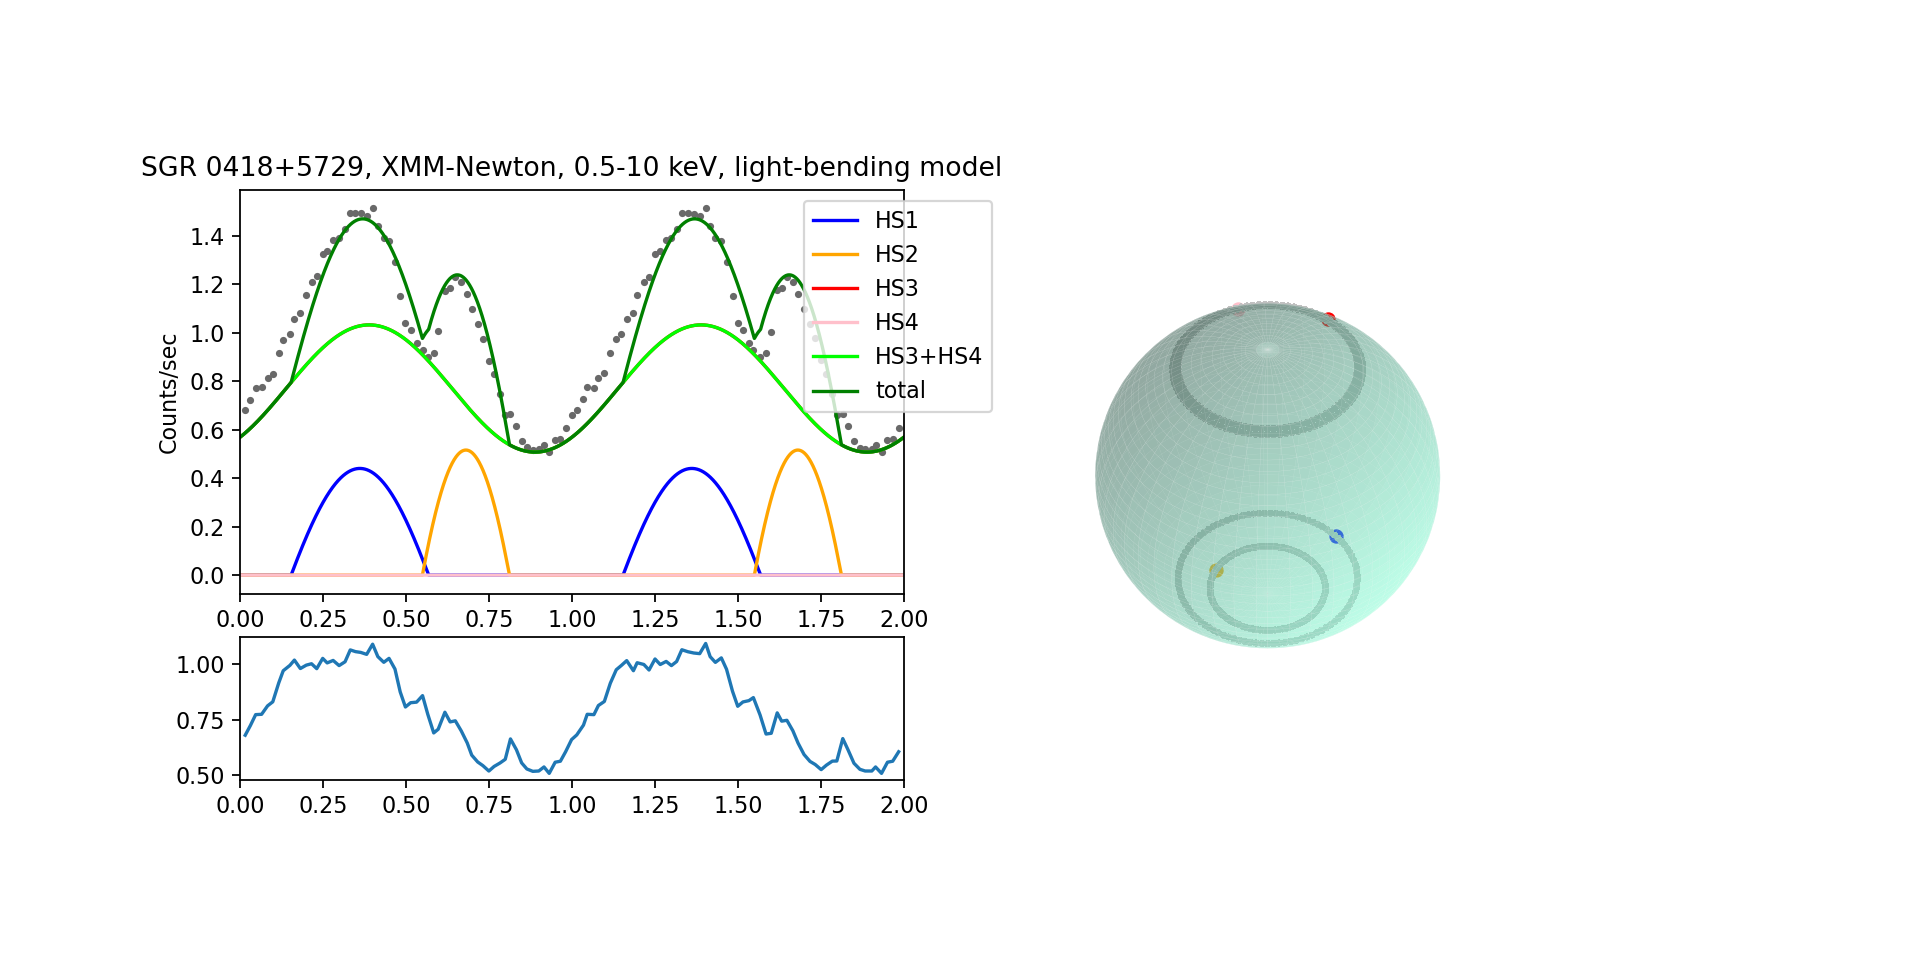

Normalization factor of HS1 is 2.4
Normalization factor of HS2 is 10
Normalization factor of HS3 is 1.05
Normalization factor of HS3 is 0


In [168]:
#%matplotlib notebook
%matplotlib qt

# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (0, 5), rowspan = 20, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)

# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
b = np.radians(45)
# HS1
a_p_1 = np.radians(148)
c_p_1 = np.radians(130)
d_p_1 = 2.4
# HS2
a_p_2 = np.radians(160)
c_p_2 = np.radians(250)
d_p_2 = 10
# HS3 140 single
a_p_3 = np.radians(32)
c_p_3 = np.radians(140)
d_p_3 = 1.05
# HS4
a_p_4 = np.radians(30)
c_p_4 = np.radians(200)
d_p_4 = 0

# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b, c_p_3, d_p_3)
HS4 = func(x, a_p_4, b, c_p_4, d_p_4)

# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
x_track_hs_4 = scale * r * np.sin(a_p_4) * np.cos(theta_sphere)
y_track_hs_4 = scale * r * np.sin(a_p_4) * np.sin(theta_sphere)
z_track_hs_4 = scale * r * np.cos(a_p_4)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")
ax2.scatter(x_track_hs_4, y_track_hs_4, z_track_hs_4, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
x_hs_4 = scale * r * np.sin(a_p_4) * np.cos(c_p_4)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
y_hs_4 = scale * r * np.sin(a_p_4) * np.sin(c_p_4)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)
z_hs_4 = scale * r * np.cos(a_p_4)

x_hs = [x_hs_1, x_hs_2, x_hs_3, x_hs_4]
y_hs = [y_hs_1, y_hs_2, y_hs_3, y_hs_4]
z_hs = [z_hs_1, z_hs_2, z_hs_3, z_hs_4]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")
ax2.scatter(x_hs[3], y_hs[3], z_hs[3], s = 30, c = "pink")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS4, label = "HS4", color = "pink")
ax1.plot(x, HS3 + HS4, label = "HS3+HS4", color = "lime")
ax1.plot(x, HS1 + HS2 + HS3 + HS4, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0418+5729, XMM-Newton, 0.5-10 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

ax2.set_box_aspect((1,1,1))
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 45, azim = 0)
ax2.axis("off")

ax3.plot(x_data, y_data - func(x_data, a_p_1, b, c_p_1, d_p_1) - func(x_data, a_p_2, b, c_p_2, d_p_2))
ax3.set_xlim(0, 2)

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)
print("Normalization factor of HS3 is", d_p_4)

plt.savefig("SGR_0418+5729_3_hot_spot_test.jpg", dpi = 200)

In [ ]:
#%matplotlib notebook
%matplotlib qt

# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# geometric figure
# Create a new figure
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = "3d")
# ax3 = plt.subplot(2, 2, 3)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere shpere isn nkae kjkkenk kkjk k

r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
b = np.radians(45)
# HS1
a_p_1 = np.radians(145)
c_p_1 = np.radians(130)
d_p_1 = 2.4
# HS2
a_p_2 = np.radians(156)
c_p_2 = np.radians(240)
d_p_2 = 5.8
# HS3 140 single
a_p_3 = np.radians(35)
c_p_3 = np.radians(80)
d_p_3 = 0.5
# HS4
a_p_4 = np.radians(35)
c_p_4 = np.radians(200)
d_p_4 = 0.5

# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b, c_p_3, d_p_3)
HS4 = func(x, a_p_4, b, c_p_4, d_p_4)


# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0418+5729_first(blue)_obs.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
x_track_hs_4 = scale * r * np.sin(a_p_4) * np.cos(theta_sphere)
y_track_hs_4 = scale * r * np.sin(a_p_4) * np.sin(theta_sphere)
z_track_hs_4 = scale * r * np.cos(a_p_4)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")
ax2.scatter(x_track_hs_4, y_track_hs_4, z_track_hs_4, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
x_hs_4 = scale * r * np.sin(a_p_4) * np.cos(c_p_4)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
y_hs_4 = scale * r * np.sin(a_p_4) * np.sin(c_p_4)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)
z_hs_4 = scale * r * np.cos(a_p_4)

x_hs = [x_hs_1, x_hs_2, x_hs_3, x_hs_4]
y_hs = [y_hs_1, y_hs_2, y_hs_3, y_hs_4]
z_hs = [z_hs_1, z_hs_2, z_hs_3, z_hs_4]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")
ax2.scatter(x_hs[3], y_hs[3], z_hs[3], s = 30, c = "pink")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS4, label = "HS4", color = "pink")
ax1.plot(x, HS3 + HS4, label = "HS3+HS4", color = "lime")
ax1.plot(x, HS1 + HS2 + HS3 + HS4, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0418+5729, XMM-Newton, 0.5-10 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

ax2.set_box_aspect((1,1,1))
ax2.view_init(elev = 45, azim = 0)
ax2.axis("off")

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)
print("Normalization factor of HS3 is", d_p_4)

plt.savefig("SGR_0418+5729_3_hot_spot.jpg", dpi = 400)

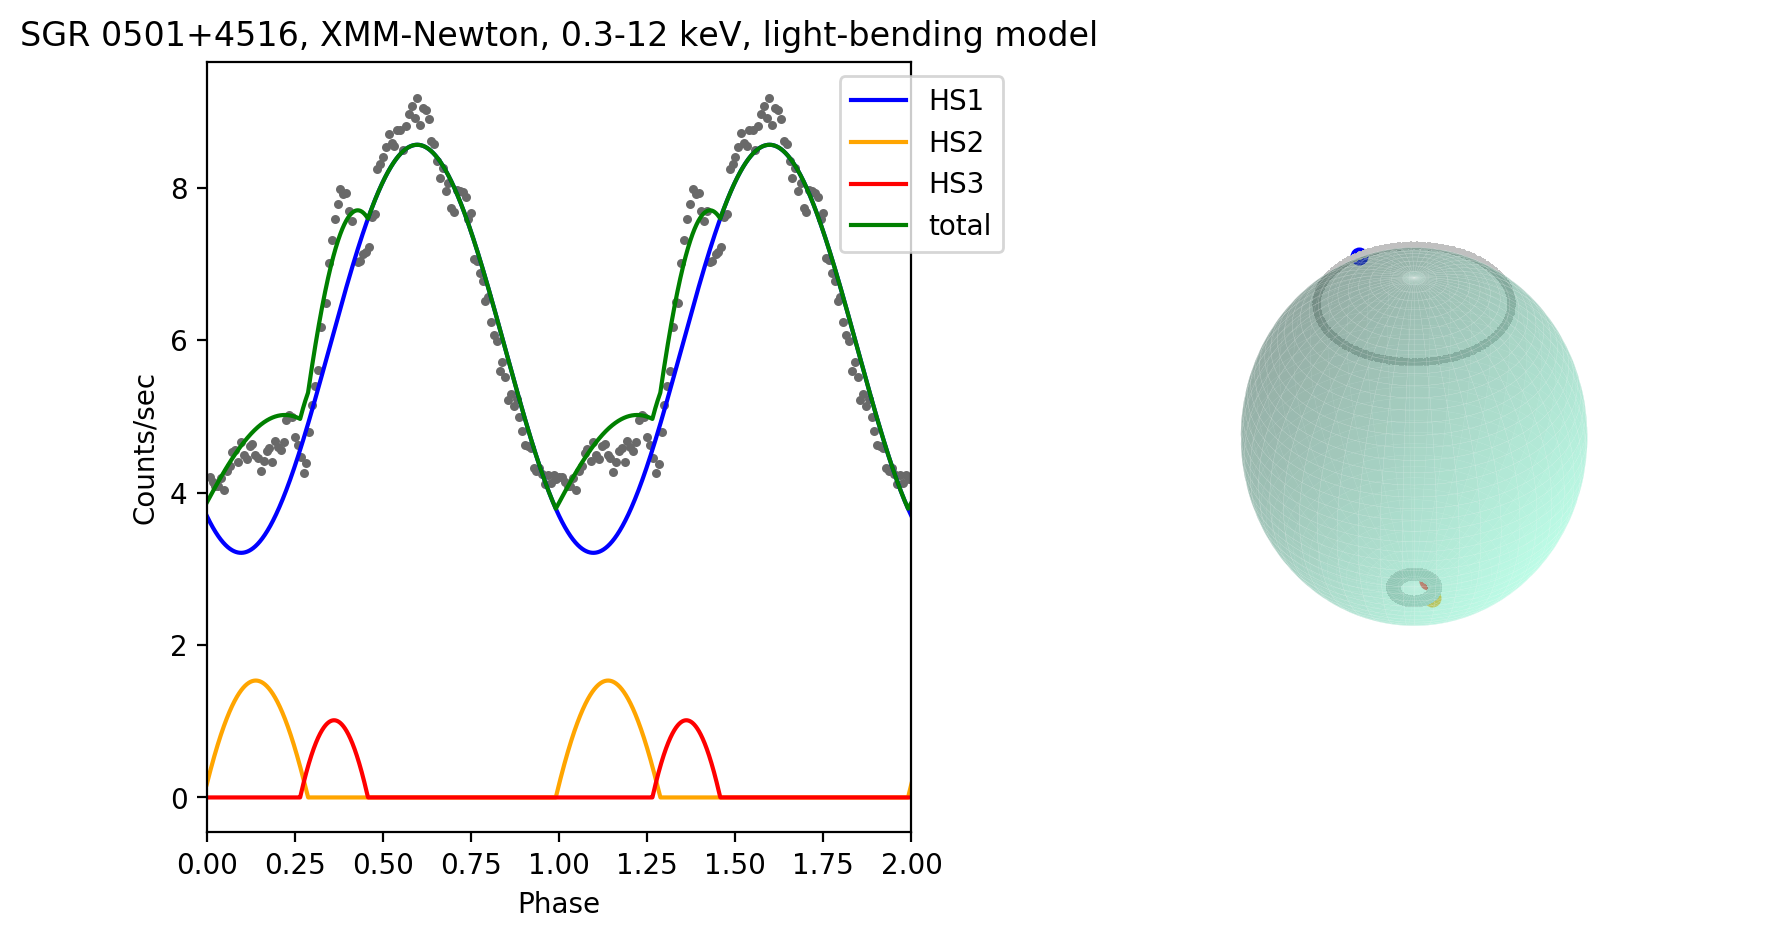

Normalization factor of HS1 is 9
Normalization factor of HS2 is 50
Normalization factor of HS3 is 100


In [28]:
# SGR 0418+5729 with 3 HS (light bending)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
from mpl_toolkits.mplot3d import axes3d, Axes3D

# geometric figure
# Create a new figure
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = "3d")
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
b = np.radians(55)
# HS1
a_p_1 = np.radians(33)
c_p_1 = np.radians(215)
d_p_1 = 9
# HS2
a_p_2 = np.radians(172)
c_p_2 = np.radians(50)
d_p_2 = 50
# HS3
a_p_3 = np.radians(174)
c_p_3 = np.radians(130)
d_p_3 = 100 #0.95

# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

HS1 = func(x, a_p_1, b, c_p_1, d_p_1)
HS2 = func(x, a_p_2, b, c_p_2, d_p_2)
HS3 = func(x, a_p_3, b, c_p_3, d_p_3)

# SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0501+4516_0.3-12keV_XMM-Newton.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(a_p_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(a_p_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(a_p_1)
x_track_hs_2 = scale * r * np.sin(a_p_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(a_p_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(a_p_2)
x_track_hs_3 = scale * r * np.sin(a_p_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(a_p_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(a_p_3)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(a_p_1) * np.cos(c_p_1)
x_hs_2 = scale * r * np.sin(a_p_2) * np.cos(c_p_2)
x_hs_3 = scale * r * np.sin(a_p_3) * np.cos(c_p_3)
y_hs_1 = scale * r * np.sin(a_p_1) * np.sin(c_p_1)
y_hs_2 = scale * r * np.sin(a_p_2) * np.sin(c_p_2)
y_hs_3 = scale * r * np.sin(a_p_3) * np.sin(c_p_3)
z_hs_1 = scale * r * np.cos(a_p_1)
z_hs_2 = scale * r * np.cos(a_p_2)
z_hs_3 = scale * r * np.cos(a_p_3)

x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")

# data
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# pulse profile
ax1.set_xlim(0, 2)
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
ax1.plot(x, HS1 + HS2 + HS3, label = "total", color = "green")
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
# info
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = "upper right")
ax1.set_title("SGR 0501+4516, XMM-Newton, 0.3-12 keV, light-bending model")

# ax2.set_xlim(-1.1, 1.1)
# ax2.set_ylim(-1.1, 1.1)
# ax2.set_zlim(-1.1, 1.1)

# ax2.set_box_aspect((1,1,1))
ax2.view_init(elev = np.degrees(math.pi / 2 - b), azim = 0)
ax2.axis("off")

plt.show()
print("Normalization factor of HS1 is", d_p_1)
print("Normalization factor of HS2 is", d_p_2)
print("Normalization factor of HS3 is", d_p_3)

# plt.savefig("SGR_0418+5729_3_hot_spot.jpg", dpi = 400)